161214
('C:\\Users\\esegu\\Documents\\Zemax', 'C:\\Users\\esegu\\Documents\\Zemax\\SAMPLES')
C:\Users\esegu\Documents\Zemax\SAMPLES\Sequential\Objectives\Cooke 40 degree field.zmx


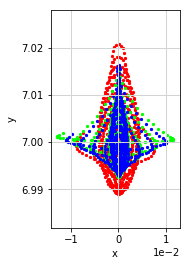

In [27]:
#this is going to be a file to interface between python and ZEMAX
#using the PyZOS library
#Thus, through a script, I can interact and run without using ZEMAX's UI
#https://pypi.python.org/pypi/PyZOS
#https://www.youtube.com/watch?v=ot5CrjMXc_w


import os
import sys
import matplotlib.pyplot as plt
import pyzdde.zdde as pyz

import shutil
import collections as co
import numpy as np

%matplotlib inline

link = pyz.createLink()

print(link.zGetVersion())
print(link.zGetPath())

filename = os.path.join(link.zGetPath()[1], 'Sequential', 'Objectives', 'Cooke 40 degree field.zmx')
print(filename)

link.zLoadFile(filename)

hx, hy = 0.0, 0.4 
spirals, rays = 10, 600
xb, yb, _,_ = link.zSpiralSpot(hx,hy,1, spirals, rays)
xg, yg, _,_ = link.zSpiralSpot(hx,hy,2, spirals, rays)
xr, yr, _,_ = link.zSpiralSpot(hx,hy,3, spirals, rays)

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.set_aspect('equal')

ax.scatter(xr,yr, s=5, c='red')
ax.scatter(xg,yg, s=5, c='lime')
ax.scatter(xb,yb, s=5, c='blue')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.grid(color='lightgray',linestyle = '-', linewidth =1)
ax.ticklabel_format(scilimits=(-2,2))

pyz.closeLink()